**Title:** INET 4061 Final Project

**Authors:** Brian Bianchi, Maaz Mohammad, Leng Her

**Date:** December 10, 2022

#Install Requirements

In [ ]:
!pip install category_encoders
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 342 kB/s 


['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting lazypredict',
 '  Downloading lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)',
 'Requirement already satisfied: joblib in /usr/local/lib/python3.8/dist-packages (from lazypredict) (1.2.0)',
 'Requirement already satisfied: lightgbm in /usr/local/lib/python3.8/dist-packages (from lazypredict) (2.2.3)',
 'Requirement already satisfied: pandas in /usr/local/lib/python3.8/dist-packages (from lazypredict) (1.3.5)',
 'Requirement already satisfied: click in /usr/local/lib/python3.8/dist-packages (from lazypredict) (7.1.2)',
 'Requirement already satisfied: scikit-learn in /usr/local/lib/python3.8/dist-packages (from lazypredict) (1.0.2)',
 'Requirement already satisfied: tqdm in /usr/local/lib/python3.8/dist-packages (from lazypredict) (4.64.1)',
 'Requirement already satisfied: xgboost in /usr/local/lib/python3.8/dist-packages (from lazypredict) (0.90)',
 'Requirement already

#Overview

**Our Objective:**


“We are seeking to determine which data science processes and models yield the most accurate predictions of housing prices from some descriptive data.”

Presentation link with more info: https://docs.google.com/presentation/d/1qPi01IXcnE6CukFmFAVa38ihbEJmujh424_hJt5eGWw/edit?usp=sharing 

#Exploratory Data Analysis

Data Source:

https://www.kaggle.com/datasets/gyanshashwat1611/housing-prices-data 

In [ ]:
import pandas as pd
import numpy as np
import scipy
import statsmodels
from category_encoders import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import math
original = pd.read_csv("train.csv")
# 1460 rows

train = original[:730]

test = original[730:]

# enc = TargetEncoder().fit(df)

# df_new = enc.transform(df)
train.shape

(730, 81)

In [ ]:
original.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
original.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
original.duplicated().sum()

0

In [ ]:
original.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

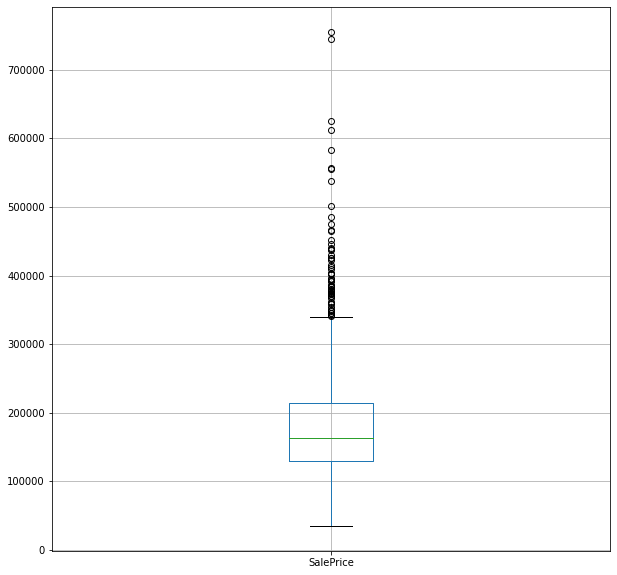

In [ ]:
original[['SalePrice']].boxplot(figsize=(10,10))

In [ ]:
original.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


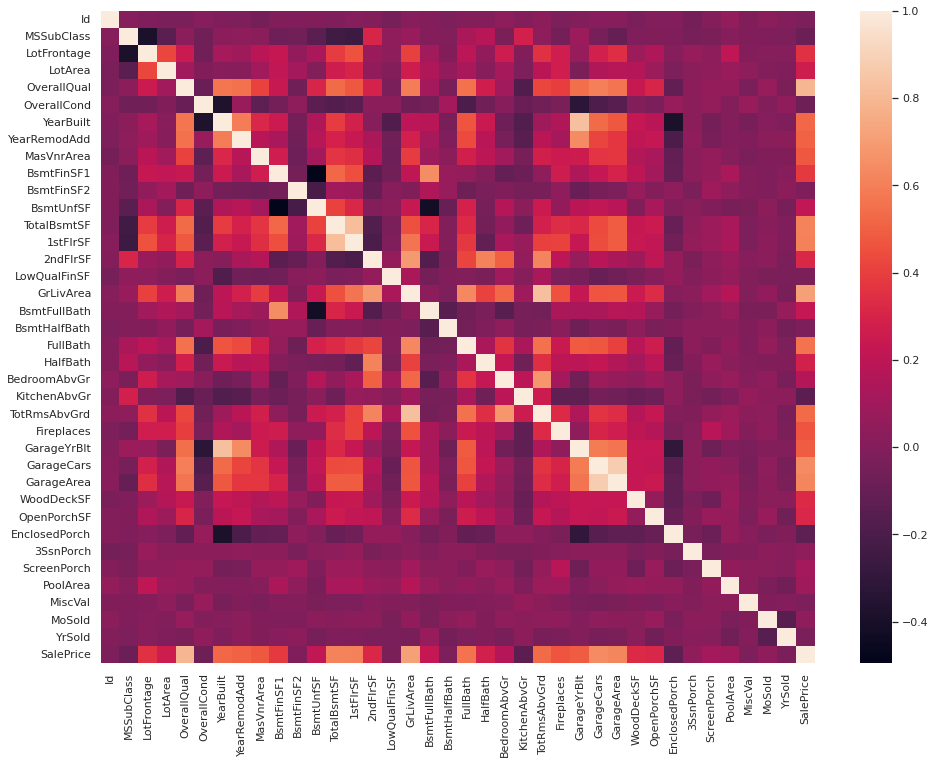

In [ ]:
import seaborn as sns
sns.set(rc={"figure.figsize":(16, 12)}) # https://www.statology.org/seaborn-figure-size/
sns.heatmap(original.corr(), linewidths=0)

In [ ]:
test.shape

(730, 81)

In [ ]:
x_train = train.drop(["SalePrice" ,"Id"], axis=1)
y_train = train["SalePrice"]

In [ ]:
x_test = test.drop(["SalePrice" ,"Id"], axis=1)
y_test = test["SalePrice"]

In [ ]:
enc = TargetEncoder()

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [ ]:
x_train_numeric = enc.fit_transform(x_train, y_train)
x_test_numeric = enc.transform(x_test)

In [ ]:
x_train_numeric.shape

(730, 79)

In [ ]:
train_temp = pd.concat([x_train_numeric, y_train], axis=1)
test_temp = pd.concat([x_test_numeric,y_test], axis=1)

In [ ]:
train_temp = train_temp.dropna()
test_temp = test_temp.dropna()
test_temp.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [ ]:
x_train_numeric = train_temp.drop(["SalePrice"], axis=1)
y_train = train_temp["SalePrice"]
x_test_numeric = test_temp.drop(["SalePrice"], axis=1)
y_test = test_temp["SalePrice"]
pd.set_option('display.max_rows', 124)
# x_train_numeric.dtypes
x_train_numeric.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [ ]:
def mse_rmse(test,pred):
  mse = mean_squared_error(test, pred)
  rmse = math.sqrt(mse)
  return mse, rmse

#Models

>Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

rand_forest = RandomForestRegressor()
rand_forest.fit(x_train_numeric, y_train)

RandomForestRegressor()

In [ ]:
score = rand_forest.score(x_train_numeric, y_train)
print(score)

0.9746150041282055


In [ ]:
y_pred = rand_forest.predict(x_test_numeric)

In [ ]:
base_random_mse, base_random_rmse = mse_rmse(y_test, y_pred)
print(base_random_mse)
print(base_random_rmse)

998656023.8840587
31601.519328729413


In [ ]:
score = rand_forest.score(x_test_numeric, y_test)
print(score)

0.8428300340322101


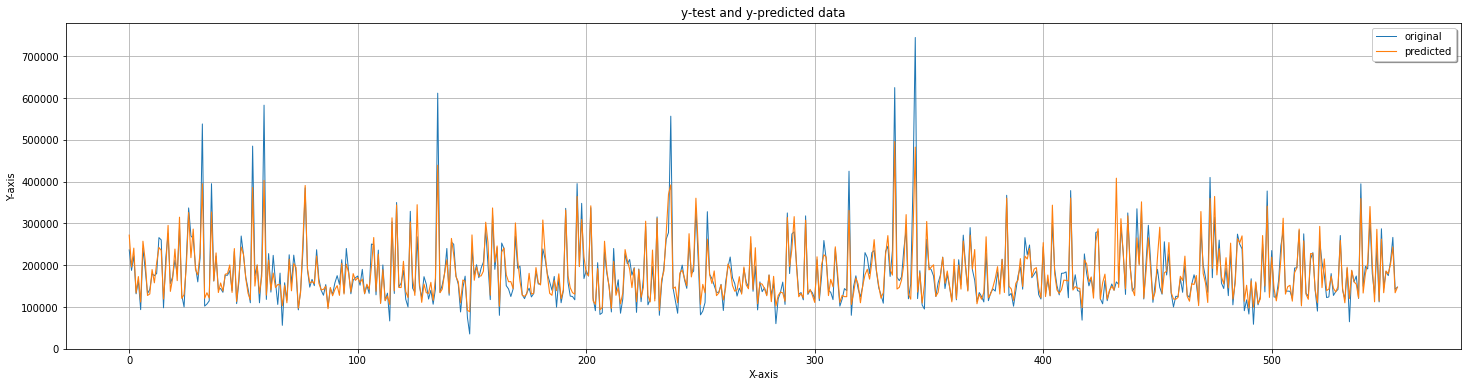

In [ ]:
plt.figure(figsize=(25,6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

>AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adamodel = AdaBoostRegressor()
adamodel.fit(x_train_numeric, y_train)
adamodel.score(x_test_numeric,y_test)


0.7894228912926889

In [ ]:
y_pred_ada = adamodel.predict(x_test_numeric)

In [ ]:
base_ada_mse, base_ada_rmse = mse_rmse(y_test,y_pred_ada)

In [ ]:
print(base_ada_mse)
print(base_ada_rmse)

1338004349.6716273
36578.741772669375


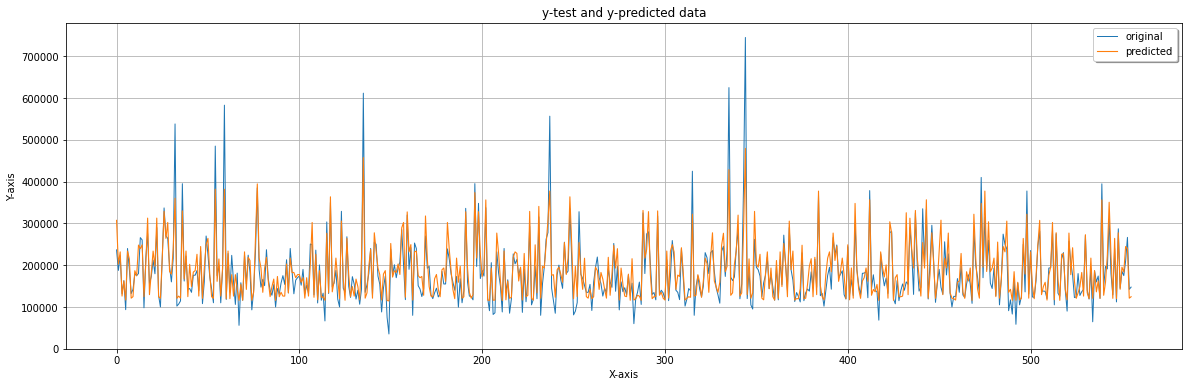

In [ ]:
plt.figure(figsize=(20,6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_ada, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

>Bagging Meta-Estimator

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
bagmeta = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
bagmeta.fit(x_train_numeric, y_train)
bagmeta.score(x_test_numeric,y_test)

0.8342795129880863

In [ ]:
y_pred_bagmeta = bagmeta.predict(x_test_numeric)

In [ ]:
base_bag_mse, base_bag_rmse = mse_rmse(y_test,y_pred_bagmeta )

In [ ]:
print(base_bag_mse)
print(base_bag_rmse)

1052985929.0633453
32449.744668692623


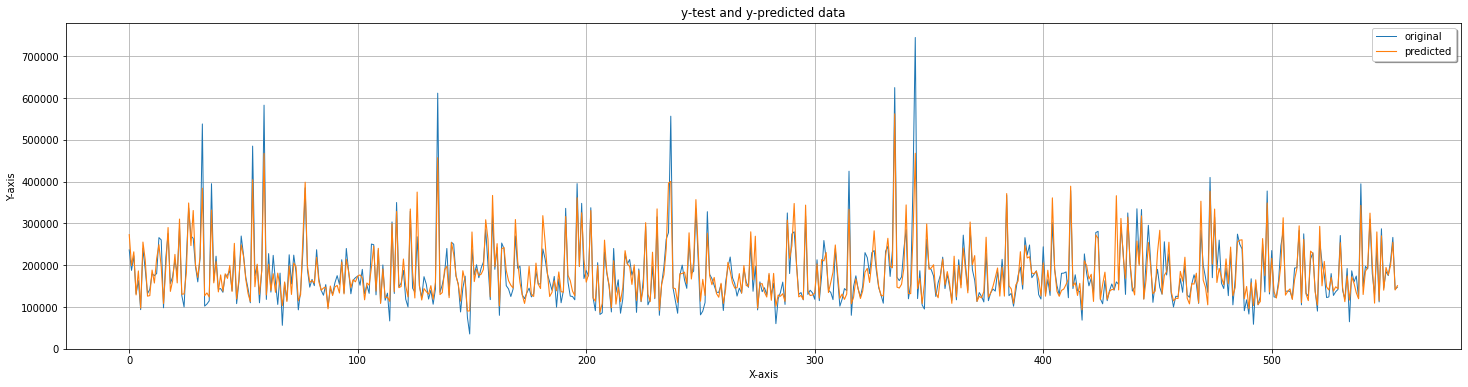

In [ ]:
plt.figure(figsize=(25,6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_bagmeta, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

>XGBoost

In [ ]:
import xgboost as xgb
xgbmodel=xgb.XGBRegressor()
xgbmodel.fit(x_train_numeric, y_train)
xgbmodel.score(x_test_numeric,y_test)

[21:05:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.867411990928935

In [ ]:
y_pred_xgb = xgbmodel.predict(x_test_numeric)

In [ ]:
base_xgb_mse, base_xgb_rmse = mse_rmse(y_test,y_pred_xgb)

In [ ]:
print(base_xgb_mse)
print(base_xgb_rmse)

842462573.1658505
29025.205824694


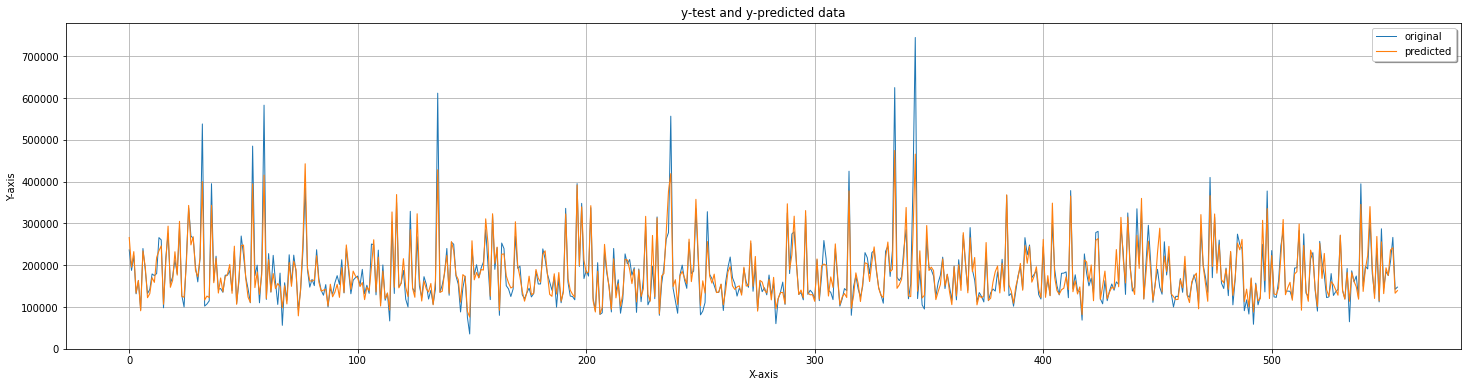

In [ ]:
plt.figure(figsize=(25,6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_xgb, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# PCA Models

In [ ]:
pca_enc = TargetEncoder()#Create an encoder for pca

pca_x_vars = original.drop(["SalePrice"],axis = 1).copy()
pca_y = original["SalePrice"].copy()
pca_x_train_numeric = pca_enc.fit_transform(pca_x_vars, pca_y)#fit new dimensions for pca

pca_x_vars = pca_enc.transform(pca_x_vars)

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [ ]:
tempConcat = pd.concat([pca_x_vars,pca_y],axis = 1)#concat both variables for droppping NaN values
tempConcat = tempConcat.dropna()#drop NaN values

In [ ]:
final_pca_x = tempConcat.drop(["Id","SalePrice"], axis =1)#drop columns we dont need for x vars
final_pca_y = tempConcat["SalePrice"]
test_pca_x = tempConcat.drop(["Id","SalePrice"], axis =1)


Text(0, 0.5, 'cumulative explained variance')

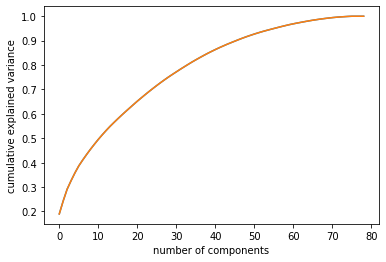

In [ ]:
X_std = StandardScaler().fit_transform(test_pca_x)#standardize data

pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca_explained = PCA(0.80).fit(X_std)
pca_explained.n_components_

34

The first 34 features explain about 80% of our variance.

In [ ]:
final_pca_x = final_pca_x.iloc[: , :34]#get the first 34 columns from the datafram and its rows because PCA

In [ ]:
pca_features = final_pca_x.columns.tolist()
print(pca_features)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1']


Features included in PCA

In [ ]:
#SPLIT THE DATASET BEFORE TESTING ON RANDOMFOREST
from sklearn.model_selection import train_test_split
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(final_pca_x, final_pca_y, test_size=0.30, random_state=42) #70:30 split for train and test -> train:test


>RandomForest Regression With PCA


In [ ]:
#Use randomforest regression on pca

rand_forest_pca = RandomForestRegressor()#create random forest test
rand_forest_pca.fit(pca_x_train, pca_y_train)

RandomForestRegressor()

In [ ]:
pca_y_pred = rand_forest_pca.predict(pca_x_test) #randomforest test

In [ ]:
pca_score = rand_forest_pca.score(pca_x_test, pca_y_test)
print(pca_score)

0.8092555332736899


In [ ]:
random_forest_mse, random_forest_rmse = mse_rmse(pca_y_test, pca_y_pred)

In [ ]:
print(random_forest_mse)
print(random_forest_rmse)

1524328130.4066467
39042.645023187746


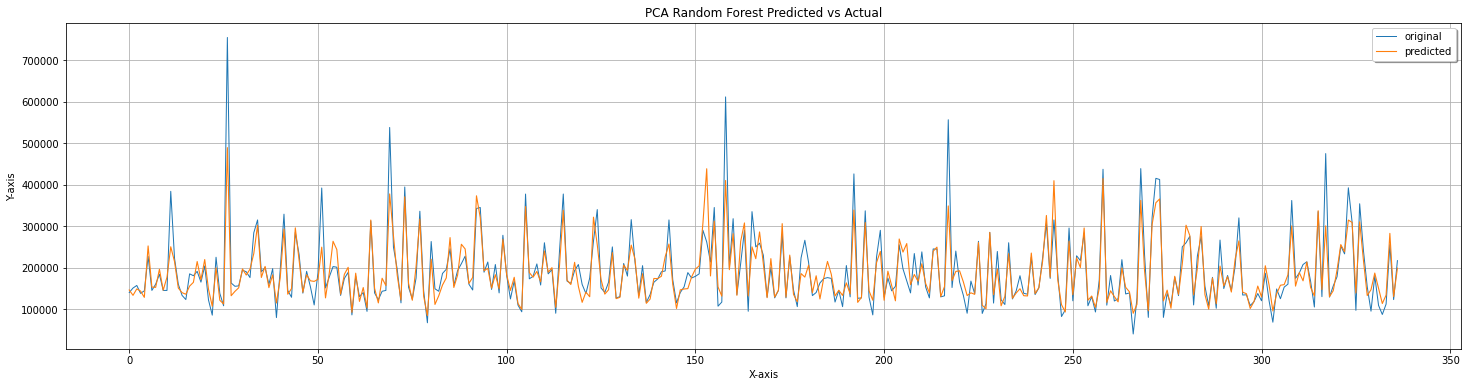

In [ ]:
plt.figure(figsize=(25,6))
x_ax = range(len(pca_y_test))
plt.plot(x_ax, pca_y_test, linewidth=1, label="original")
plt.plot(x_ax, pca_y_pred, linewidth=1.1, label="predicted")
plt.title("PCA Random Forest Predicted vs Actual")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

>AdaBoost with PCA

In [ ]:
PCA_adamodel = AdaBoostRegressor()
PCA_adamodel.fit(pca_x_train, pca_y_train)
PCA_adamodel.score(pca_x_test,pca_y_test)

0.7816007831843239

In [ ]:
PCA_y_pred_ada = PCA_adamodel.predict(pca_x_test)

In [ ]:
ada_mse, ada_rmse = mse_rmse(pca_y_test, PCA_y_pred_ada)

In [ ]:

print(ada_mse)
print(ada_rmse)

1745330155.9126995
41777.148728852946


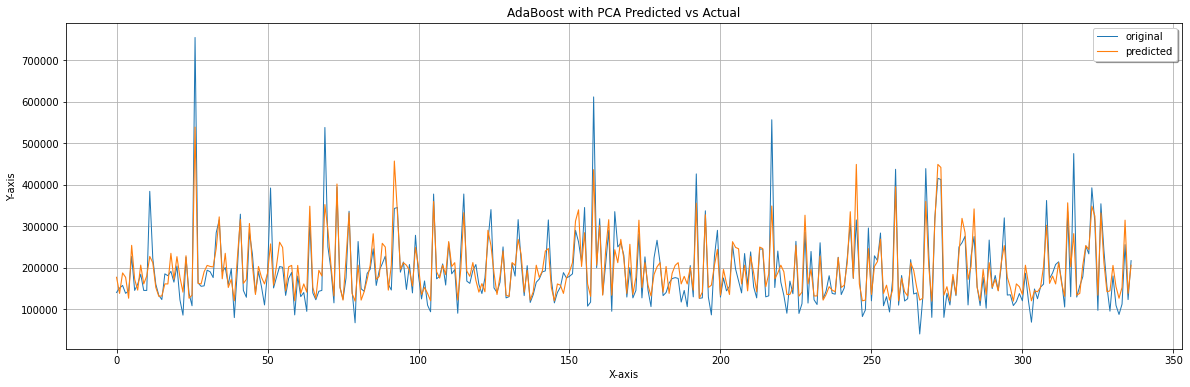

In [ ]:
plt.figure(figsize=(20,6))
x_ax = range(len(pca_y_test))
plt.plot(x_ax,pca_y_test, linewidth=1, label="original")
plt.plot(x_ax, PCA_y_pred_ada, linewidth=1.1, label="predicted")
plt.title("AdaBoost with PCA Predicted vs Actual")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

>Bagging Meta-Estimator with PCA

In [ ]:
pca_bagmeta = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
pca_bagmeta.fit(pca_x_train, pca_y_train)
pca_bagmeta.score(pca_x_test,pca_y_test)

0.7921747283566334

In [ ]:
pca_y_pred_bagmeta = pca_bagmeta.predict(pca_x_test)

In [ ]:
baggingMeta_mse, baggingMeta_rmse = mse_rmse(pca_y_test, pca_y_pred_bagmeta)

In [ ]:
print(baggingMeta_mse)
print(baggingMeta_rmse)

1660828820.9478633
40753.26761068201


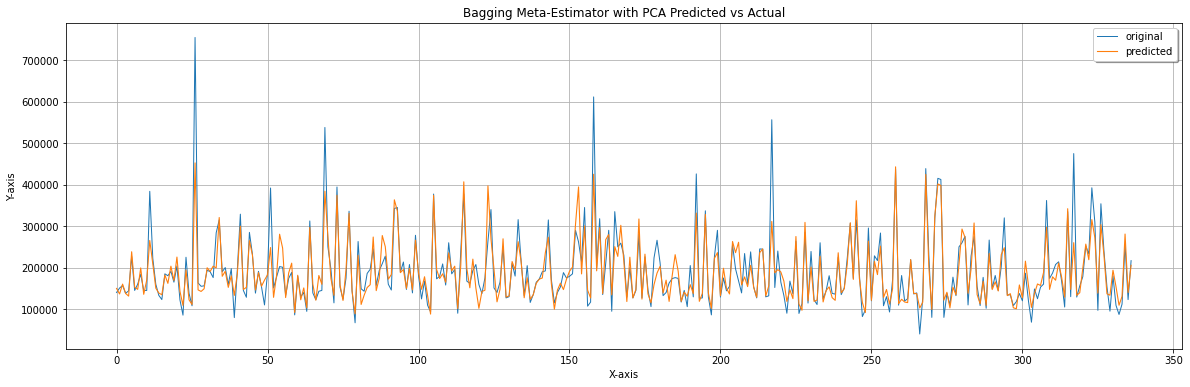

In [ ]:
plt.figure(figsize=(20,6))
x_ax = range(len(pca_y_test))
plt.plot(x_ax,pca_y_test, linewidth=1, label="original")
plt.plot(x_ax, pca_y_pred_bagmeta, linewidth=1.1, label="predicted")
plt.title("Bagging Meta-Estimator with PCA Predicted vs Actual")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

>XGBoost With PCA

In [ ]:
pca_xgbmodel=xgb.XGBRegressor()
pca_xgbmodel.fit(pca_x_train, pca_y_train)
pca_xgbmodel.score(pca_x_test,pca_y_test)

[21:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8325806551744855

In [ ]:
pca_y_pred_xgb = pca_xgbmodel.predict(pca_x_test)

In [ ]:
xgb_mse,xgb_rmse = mse_rmse(pca_y_test, pca_y_pred_xgb)

In [ ]:
print(xgb_mse)
print(xgb_rmse)

1337926186.1260653
36577.6733284946


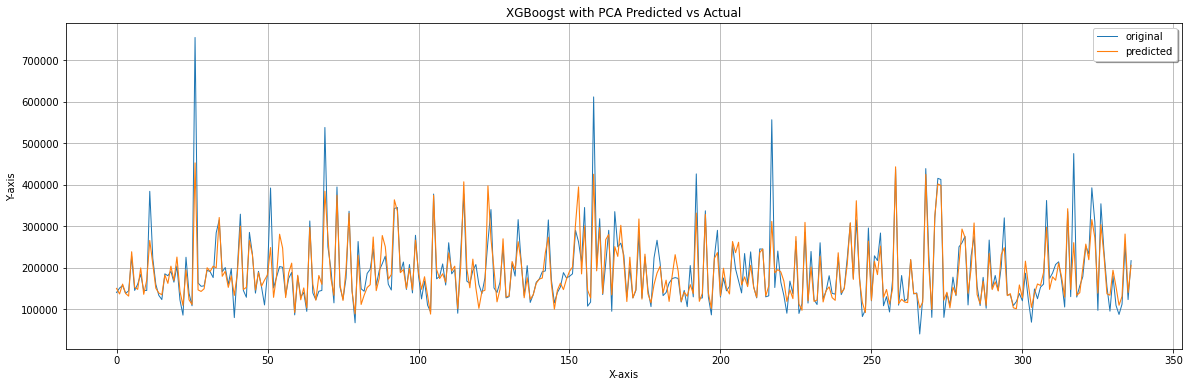

In [ ]:
plt.figure(figsize=(20,6))
x_ax = range(len(pca_y_test))
plt.plot(x_ax,pca_y_test, linewidth=1, label="original")
plt.plot(x_ax, pca_y_pred_bagmeta, linewidth=1.1, label="predicted")
plt.title("XGBoogst with PCA Predicted vs Actual")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Stepwise feature selection

In [ ]:
stepwise_x = tempConcat.drop(["SalePrice","Utilities"], axis = 1)#The Utilities column was causing ERRORS so it was removed. The P-Value obtained from it was 0.0 so regardless it would not have been included
#Therefore it shouold have no impact on the stepwise selection
stepwise_y = tempConcat["SalePrice"]

In [ ]:
import warnings #for ignoring warnings https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
def stepwise_selection(X, y):
    initial_list=[]
    threshold_in=0.01, 
    threshold_out = 0.05, 
    verbose=True
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            warnings.filterwarnings("ignore")#used to ignore warnings
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
#            best_feature = new_pval.argmin()
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            try:
              included.remove(worst_feature)

            except ValueError:
              print(f" {worst_feature} Not in list")
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
                changed = False
        
        if not changed:
            break
  
    return included


In [ ]:
result = stepwise_selection(stepwise_x, stepwise_y)

<ipython-input-62-53029cf363d1>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  OverallQual                    with p-value 3.17361e-248
Add  GrLivArea                      with p-value 7.51658e-60
Add  Neighborhood                   with p-value 4.64119e-59
Add  BsmtExposure                   with p-value 1.06688e-24
Add  KitchenQual                    with p-value 2.27198e-21
Add  MSSubClass                     with p-value 5.90547e-19
Add  BsmtQual                       with p-value 1.28034e-12
Add  BsmtFinSF1                     with p-value 1.74117e-08
Add  RoofMatl                       with p-value 2.92471e-08
Add  OverallCond                    with p-value 2.55581e-06
Add  GarageCars                     with p-value 2.70328e-08
Add  PoolQC                         with p-value 6.19418e-05
Add  PoolArea                       with p-value 3.32161e-07
Add  SaleCondition                  with p-value 6.94228e-05
Add  LotConfig                      with p-value 0.000128068
Add  ScreenPorch                    with p-value 0.000239651
Add  MasVnrArea        

In [ ]:
print(result)

['OverallQual', 'GrLivArea', 'Neighborhood', 'BsmtExposure', 'KitchenQual', 'MSSubClass', 'BsmtQual', 'BsmtFinSF1', 'RoofMatl', 'OverallCond', 'GarageCars', 'PoolQC', 'PoolArea', 'SaleCondition', 'LotConfig', 'ScreenPorch', 'MasVnrArea', 'Condition2', 'Condition1', 'Fireplaces', 'TotRmsAbvGrd', 'ExterQual', 'BsmtFinSF2', 'LotFrontage', 'LandContour']


In [ ]:
len(result)

25

In [ ]:
final_step_x = tempConcat[result]
final_step_y = tempConcat["SalePrice"]

In [ ]:
#Split data for testing 

step_x_train, step_x_test, step_y_train, step_y_test = train_test_split(final_step_x, final_step_y, test_size=0.30, random_state=42)

>RandomForest Regression with Stepwise Feature selection

In [ ]:
rand_forest_stepwise = RandomForestRegressor()#create random forest test
rand_forest_stepwise.fit(step_x_train, step_y_train)

RandomForestRegressor()

In [ ]:
stepwise_y_pred = rand_forest_stepwise.predict(step_x_test)

In [ ]:
stepwise_score = rand_forest_stepwise.score(step_x_test, step_y_test)
print(stepwise_score)

0.8807565133889832


In [ ]:
random_step_mse,random_step_rmse = mse_rmse(step_y_test, stepwise_y_pred)

In [ ]:
print(random_step_mse)
print(random_step_rmse)

952930400.1764237
30869.570780566803


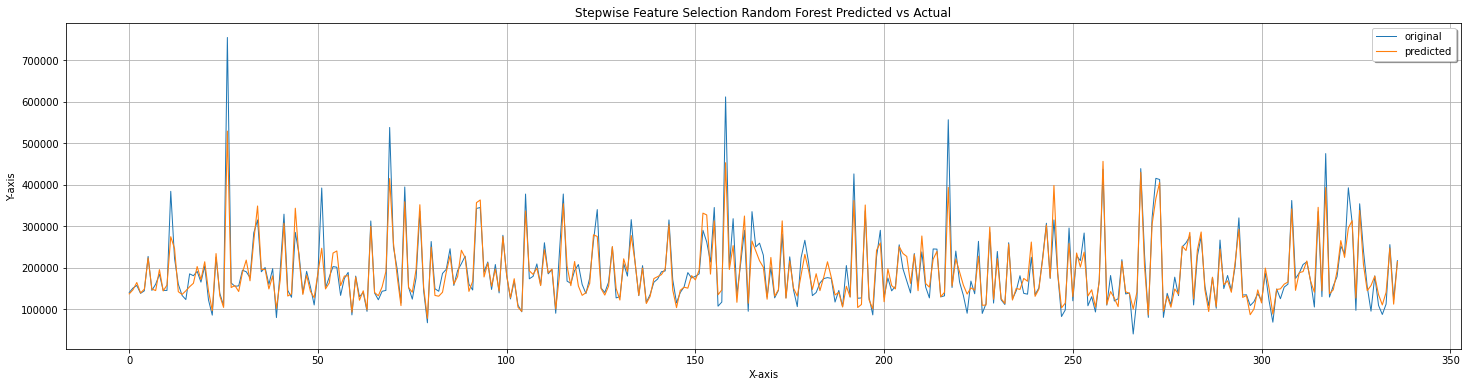

In [ ]:
plt.figure(figsize=(25,6))
x_ax = range(len(step_y_test))
plt.plot(x_ax, step_y_test, linewidth=1, label="original")
plt.plot(x_ax, stepwise_y_pred, linewidth=1.1, label="predicted")
plt.title("Stepwise Feature Selection Random Forest Predicted vs Actual")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

>AdaBoost with Stepwise Feature Selection

In [ ]:
stepwise_adamodel = AdaBoostRegressor()
stepwise_adamodel.fit(step_x_train, step_y_train)
stepwise_adamodel.score(step_x_test,step_y_test)

0.8483483044431357

In [ ]:
stepwise_y_pred_ada = stepwise_adamodel.predict(step_x_test)

In [ ]:
ada_mse_step, ada_rmse_step = mse_rmse(step_y_test,stepwise_y_pred_ada ) 

In [ ]:
print(ada_mse_step)
print(ada_rmse_step)

1211919535.7466547
34812.63471423349


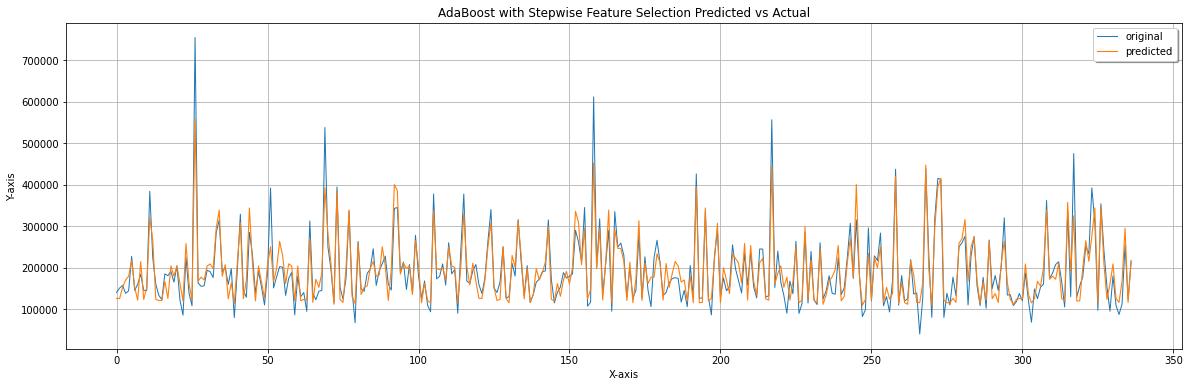

In [ ]:
plt.figure(figsize=(20,6))
x_ax = range(len(step_y_test))
plt.plot(x_ax,step_y_test, linewidth=1, label="original")
plt.plot(x_ax, stepwise_y_pred_ada, linewidth=1.1, label="predicted")
plt.title("AdaBoost with Stepwise Feature Selection Predicted vs Actual")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

>Bagging Meta-Estimater with Stepwise Feature Selection


In [ ]:
stepwise_bagmeta = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
stepwise_bagmeta.fit(step_x_train, step_y_train)
stepwise_bagmeta.score(step_x_test,step_y_test)

0.8702336031597314

In [ ]:
stepwise_y_pred_bagmeta = stepwise_bagmeta.predict(step_x_test)

In [ ]:
bagging_mse_step,bagging_rmse_step = mse_rmse(step_y_test,stepwise_y_pred_bagmeta)

In [ ]:
print(bagging_mse_step)
print(bagging_rmse_step)

1037023891.0728488
32202.855324844237


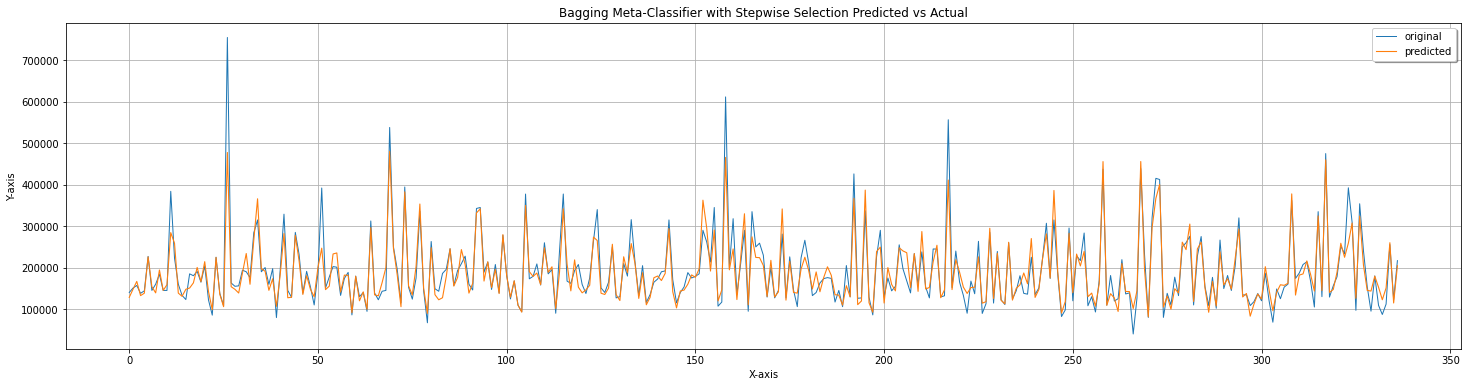

In [ ]:
plt.figure(figsize=(25,6))
x_ax = range(len(step_y_test))
plt.plot(x_ax, step_y_test, linewidth=1, label="original")
plt.plot(x_ax, stepwise_y_pred_bagmeta, linewidth=1.1, label="predicted")
plt.title("Bagging Meta-Classifier with Stepwise Selection Predicted vs Actual")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

>XGBoost with Stepwise Feature Selection

In [ ]:
stepwise_xgbmodel=xgb.XGBRegressor()
stepwise_xgbmodel.fit(step_x_train, step_y_train)
stepwise_xgbmodel.score(step_x_test,step_y_test)

[21:06:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.899743937268905

In [ ]:
stepwise_y_pred_xgb = stepwise_xgbmodel.predict(step_x_test)

In [ ]:
xgb_step_mse, xgb_step_rmse = mse_rmse(step_y_test,stepwise_y_pred_xgb )

In [ ]:
print(xgb_step_mse)
print(xgb_step_rmse)

801193026.9206706
28305.353326193803


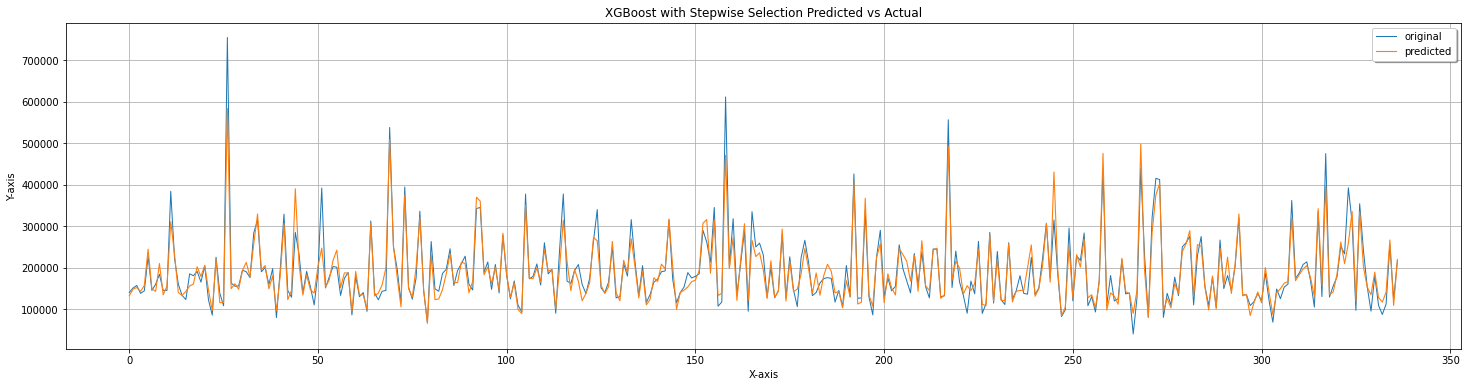

In [ ]:
plt.figure(figsize=(25,6))
x_ax = range(len(step_y_test))
plt.plot(x_ax, step_y_test, linewidth=1, label="original")
plt.plot(x_ax, stepwise_y_pred_xgb, linewidth=1.1, label="predicted")
plt.title("XGBoost with Stepwise Selection Predicted vs Actual")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Final Scores

In [ ]:
print("**********Base Model Accuracy Scores**********")
print(f"Random Forest Regressor Model Score: {score*100:,.3f}%")
print(f"AdaBoost Model Score: {adamodel.score(x_test_numeric,y_test)*100:,.3f}%")
print(f"Bagging Meta-Estimator Model Score: {bagmeta.score(x_test_numeric,y_test)*100:,.3f}%")
print(f"XGBoost Model Score: {xgbmodel.score(x_test_numeric,y_test)*100:,.3f}% \n")
print("**********Principle Component Analysis Accuracy Scores**********")
print(f"PCA Random Forest Regressor Model Score: {pca_score*100:,.3f}%")
print(f"PCA AdaBoost Model Score: {PCA_adamodel.score(pca_x_test,pca_y_test)*100:,.3f}%")
print(f"PCA Bagging Meta-Estimator Model Score: {pca_bagmeta.score(pca_x_test,pca_y_test)*100:,.3f}%")
print(f"PCA XGBoost Model Score: {pca_xgbmodel.score(pca_x_test,pca_y_test)*100:,.3f}% \n")
print("**********Stepwise Feature Selection Accuracy Scores**********")
print(f"Stepwise Selection Random Forest Regressor Model Score: {stepwise_score*100:,.3f}%")
print(f"Stepwise Selection AdaBoost Model Score: {stepwise_adamodel.score(step_x_test,step_y_test)*100:,.3f}%")
print(f"Stepwise Selection Bagging Meta-Estimator Model Score: {stepwise_bagmeta.score(step_x_test,step_y_test)*100:,.3f}%")
print(f"Stepwise Selection XGBoost Model Score: {stepwise_xgbmodel.score(step_x_test,step_y_test)*100:,.3f}%")

**********Base Model Accuracy Scores**********
Random Forest Regressor Model Score: 84.283%
AdaBoost Model Score: 78.942%
Bagging Meta-Estimator Model Score: 83.428%
XGBoost Model Score: 86.741% 

**********Principle Component Analysis Accuracy Scores**********
PCA Random Forest Regressor Model Score: 80.926%
PCA AdaBoost Model Score: 78.160%
PCA Bagging Meta-Estimator Model Score: 79.217%
PCA XGBoost Model Score: 83.258% 

**********Stepwise Feature Selection Accuracy Scores**********
Stepwise Selection Random Forest Regressor Model Score: 88.076%
Stepwise Selection AdaBoost Model Score: 84.835%
Stepwise Selection Bagging Meta-Estimator Model Score: 87.023%
Stepwise Selection XGBoost Model Score: 89.974%


#Lazypredict

>Stepwise Feature Selection


In [ ]:
from lazypredict.Supervised import LazyRegressor#https://pypi.org/project/lazypredict/

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(step_x_train, step_x_test, step_y_train, step_y_test)

100%|██████████| 42/42 [00:20<00:00,  2.01it/s]

[21:06:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.89,0.90,28305.62,0.11
GradientBoostingRegressor,0.89,0.90,28862.67,0.25
PoissonRegressor,0.88,0.89,29262.83,0.02
BaggingRegressor,0.87,0.88,30529.80,0.08
GammaRegressor,0.87,0.88,30967.12,0.03
RandomForestRegressor,0.87,0.88,30983.56,0.42
HuberRegressor,0.87,0.88,31155.30,0.02
PassiveAggressiveRegressor,0.87,0.88,31335.30,0.11
LGBMRegressor,0.86,0.87,31867.27,0.08


>PCA

In [ ]:

reg2 = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models2,predictions2 = reg.fit(pca_x_train, pca_x_test,  pca_y_train, pca_y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:15<00:00,  2.44it/s]

[21:06:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:15<00:00,  2.71it/s]


In [ ]:
models2

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.81,0.83,36577.51,0.15
BaggingRegressor,0.81,0.83,36617.36,0.05
ExtraTreesRegressor,0.81,0.83,36761.78,0.40
GradientBoostingRegressor,0.81,0.83,36838.98,0.23
PoissonRegressor,0.81,0.83,37028.51,0.02
LGBMRegressor,0.80,0.82,38304.05,0.09
HistGradientBoostingRegressor,0.79,0.82,38426.48,0.30
RandomForestRegressor,0.79,0.81,38884.27,0.51
HuberRegressor,0.78,0.80,40195.76,0.04


#Conclusion

- The model with the highest Adjusted R-Squared and lowest Root Mean Squared Error (RMSE) is usually the best, as it explains the most variance in the data (Adjusted R-Squared) while predicting with the lowest difference from the actual values.

- By those metrics, the best model we produced was the XGB Regression Model *with* Stepwise Feature Selection


https://www.statology.org/rmse-vs-r-squared/ 

**Why did that model perform the best?**

An XGBoost model is ultimately a very thorough derivative of a gradient boosted trees algorithm. Gradient boosted trees already tend to be fairly accurate because they are thorough, and this particular variant seems to be especially good at predictions in this case.

The Stepwise Feature Selection applied also is a high accuracy way of reducing to features which truly matter in predictions; this puts the XGBoost with Stepwise Feature Selection ahead of the XGBoost without, and helps make it the most accurate model we attempted.

In conclusion, we accomplished our objective - we determined what the best model for predicting housing prices from a dataset comprised of various details about homes was - XGB Regression with Stepwise Feature Selecion. We also were able to yield a confidently high prediction from this model of that data, meaning we didn't *just* find the most accurate model relative to other models, we found a model that was in general good at predicting these prices. We also found several other models that, while not as good, would likely be sufficiently accurate alternatives.

All of this being said, it should be noted that this modeling method may not be the best for other locations; Iowa is not representative of the entire United States, let alone the world. The nature in which housing features effect the price of the home may vary between Iowa and other regions.

That being said, the same reasons XGB Regression excelled here likely would compel it to be successful elsewhere.

# Additional References

https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447

https://planspace.org/20150423-forward_selection_with_statsmodels/

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error 

https://corporatefinanceinstitute.com/resources/data-science/r-squared/

https://www.investopedia.com/terms/p/p-value.asp

https://pypi.org/project/lazypredict/